In [3]:
# /Users/developer/PycharmProjects/serverless-function-placement/tests/FIB-Multi-Thread/Thread-1/CPU/FIB-20-2-Node/main_core_requestlog.csv
# d_frame[d_frame['col'].str.contains('foo', regex=False)]

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
#import sys
#!{sys.executable} -m pip install filterpy

  Using cached filterpy-1.4.5.zip (177 kB)
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110449 sha256=16c3e8e69a1f3018022c2e17789acc66b330db153603b0c82d0081a22a8c286f
  Stored in directory: /Users/developer/Library/Caches/pip/wheels/fe/f6/cb/40331472edf4fd399b8cad02973c6acbdf26898342928327fe
Successfully built filterpy


,index,function,latency,url,req_time,res_time,node_id,processing_type,request_method
0,45,fib,2.179183,https://68.183.65.68/api/v1/web/playground/use...,2021-03-07 14:35:15.926591,2021-03-07 14:35:15.926591,3,linear_cpu,GET
1,46,fib,1.187936,https://207.154.201.82/api/v1/web/playground/u...,2021-03-07 14:35:22.139890,2021-03-07 14:35:22.139890,1,linear_cpu,GET
2,47,fib,1.140899,https://207.154.201.82/api/v1/web/playground/u...,2021-03-07 14:35:28.310681,2021-03-07 14:35:28.310681,1,linear_cpu,GET
3,48,fib,1.266715,https://68.183.65.68/api/v1/web/playground/use...,2021-03-07 14:35:34.604351,2021-03-07 14:35:34.604351,3,linear_cpu,GET
4,49,fib,1.130951,https://207.154.201.82/api/v1/web/playground/u...,2021-03-07 14:35:40.761942,2021-03-07 14:35:40.761942,1,linear_cpu,GET
...,...,...,...,...,...,...,...,...,...
295,340,fib,1.137713,https://68.183.65.68/api/v1/web/playground/use...,2021-03-07 15:05:35.491508,2021-03-07 15:05:35.491508,3,linear_cpu,GET
296,341,fib,1.140185,https://207.154.201.82/api/v1/web/playground/u...,2021-03-07 15:05:41.674611,2021-03-07 15:05:41.674611,1,linear_cpu,GET
297,342,fib,1.886703,https://207.154.201.82/api/v1/web/playground/u...,2021-03-07 15:05:48.585691,2021-03-07 15:05:48.585691,1,linear_cpu,GET
298,343,fib,1.247313,https://68.183.65.68/api/v1/web/playground/use...,2021-03-07 15:05:54.855952,2021-03-07 15:05:54.855952,3,linear_cpu,GET


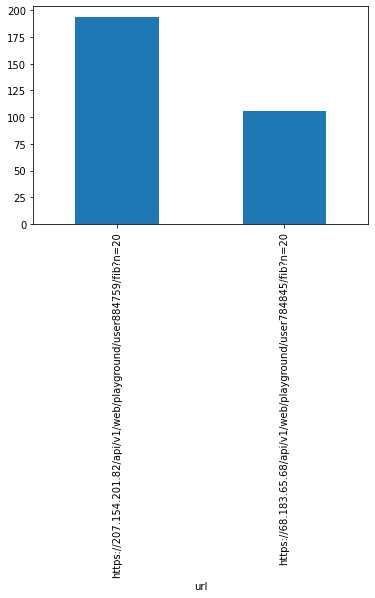

In [34]:
%matplotlib inline 
#notebook
import IPython
import pandas as pd
import matplotlib.pyplot as plt

d_frame=pd.read_csv("/Users/developer/PycharmProjects/serverless-function-placement/tests/FIB-Multi-Thread/Thread-1/CPU/FIB-20-2-Node/main_core_requestlog.csv",
                   sep=',', 
                    nrows=300,
                  names=["index", "function", "latency", "url","req_time","res_time","node_id","processing_type","request_method"])
# display(d_frame)
groups = d_frame.groupby(['url']).size()


labels = ['207.154.201.82', '68.183.65.68']

groups.plot.bar();





In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt


labels = ['15', '15 KF', '20', '20 KF', '25', '25-KF', '30', '30-KF']

# 128.199.24.171
blr_means = [189, 29, 165, 24, 175, 19, 151, 22]

# 68.183.65.68
fr_means = [0, 137, 0, 98, 0, 118, 0 , 108]

# 138.68.186.254
lon_means = [7, 102, 17, 89, 10,77, 16, 89]

# 104.236.108.99
nyc_means = [2, 28, 0, 51,0, 52, 0, 48]

#1 43.110.145.253
sfo_means = [72, 67, 94, 86, 85, 91, 131,72]

# 188.166.233.219
sgp_means = [230, 58, 224, 69, 230, 59, 202, 67]

# 68.183.207.236
tor_means = [0, 79, 0,83, 0, 84, 0, 94]


width = 0.2       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, blr_means, width,  label='Banglore') 
ax.bar(labels, fr_means,  width,  label='Frankfurt', bottom=fr_means)
ax.bar(labels, lon_means, width,  label='London',    bottom=lon_means)
ax.bar(labels, nyc_means, width,  label='New York',  bottom=nyc_means)
ax.bar(labels, sfo_means, width,  label='San Franciso', bottom=sfo_means)
ax.bar(labels, sgp_means, width,  label='Singapour', bottom=sgp_means)
ax.bar(labels, tor_means, width,  label='Toronto', bottom=tor_means)


ax.set_ylabel('Calls counting')
ax.set_title('Call on geographically distrubuted nodes.')
ax.legend()

#plt.show()

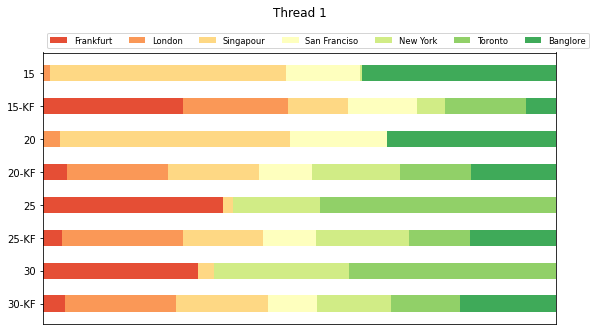

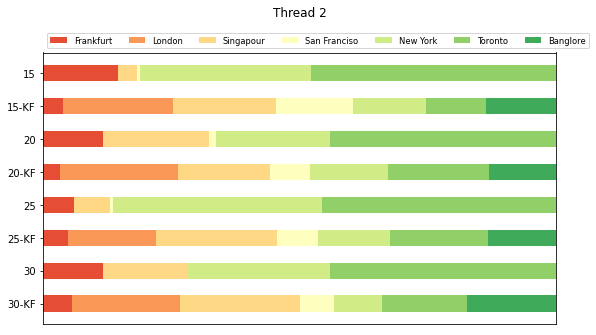

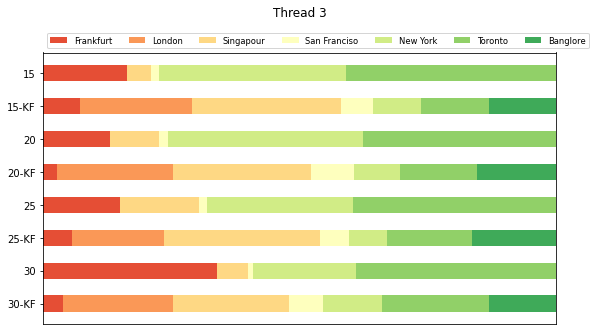

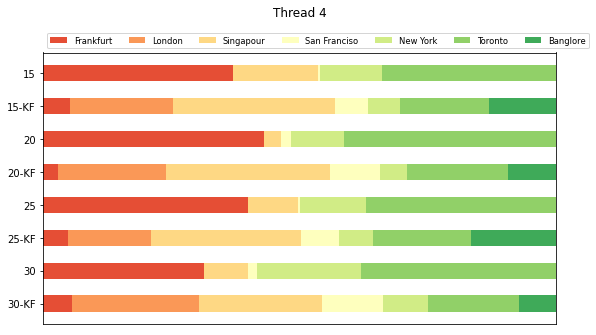

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




# 128.199.24.171 blr_means
# 68.183.65.68 fr_means 
# 138.68.186.254 lon_means 
# 104.236.108.99 nyc_means 
# 43.110.145.253 sfo_means 
# 188.166.233.219 sgp_means 
# 68.183.207.236 tor_means 


#category_names = ['Banglore', 'Frankfurt', 'London', 'New York', 'San Franciso','Singapour','Toronto']
category_names = [ 'Frankfurt', 'London', 'Singapour','San Franciso', 'New York', 'Toronto','Banglore']





results = {
    '15':    [0,    7, 230,  72,   2,   0, 189],
    '15-KF': [137,102,58,67,28,79,29],
    '20':    [0,17,224,94,0,0,165],
    '20-KF': [24,  98,  89,  51,  86,  69, 83],
    '25':    [175,  0,  10,   0,  85, 230, 0],
    '25-KF': [19, 118,  77,  52,  91,  59, 84],
    '30':    [151,  0,  16,   0, 131, 202, 0],
    '30-KF': [22, 108,  89,  48,  72,  67, 94]
}


results_thread_2 = {
    '15':    [44, 0,  11,  2, 100, 143, 0],
    '15-KF': [12, 64, 60, 45,  43,  35, 41],
    '20':    [35, 0,  62,  4,  67, 132, 0],
    '20-KF': [10, 69, 54, 23,  46,  59, 39],
    '25':    [18, 0,  21,  2, 122, 137, 0],
    '25-KF': [15, 51, 71, 24,  42,  57, 40],
    '30':    [35, 0,  49,  0,  84, 132, 0],
    '30-KF': [17, 63, 70, 20,  28,  50, 52]
}

results_thread_3 = {
    '15':    [ 49,  0, 14,  5, 109, 123,  0],
    '15-KF': [ 22, 65, 87, 19,  28,  40, 39],
    '20':    [ 39,  0, 29,  5, 114, 113, 0],
    '20-KF': [  8, 68, 81, 25,  27,  45, 46],
    '25':    [ 45,  0, 46,  5,  85, 119, 0],
    '25-KF': [ 17, 54, 91, 17,  22,  50, 49],
    '30':    [102,  0, 18,  3,  60, 117, 0],
    '30-KF': [ 12, 64, 68, 20,  34,  63, 39]
}


results_thread_4 = {
    '15':    [ 111,  0, 50,  1, 36, 102, 0],
    '15-KF': [  16, 60, 95, 19, 19,  52, 39],
    '20':    [ 129,  0, 10,  6, 31, 124, 0],
    '20-KF': [   9, 63, 96, 29, 16,  59, 28],
    '25':    [ 120,  0, 29,  1, 39, 111, 0],
    '25-KF': [  15, 48, 88, 22, 20,  57, 50],
    '30':    [  94,  0, 26,  5, 61, 114, 0],
    '30-KF': [  17, 74, 72, 36, 26,  53, 22]
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

plt.title('Thread 1\n\n')
plt.show()


survey(results_thread_2, category_names)

plt.title('Thread 2\n\n')
plt.show()

survey(results_thread_3, category_names)

plt.title('Thread 3\n\n')
plt.show()

survey(results_thread_4, category_names)

plt.title('Thread 4\n\n')
plt.show()


In [2]:
%matplotlib inline 
#notebook
import IPython
import pandas as pd
import matplotlib.pyplot as plt


def data_counter_process(thread_count):
    thread_path= "/Users/developer/PycharmProjects/serverless-function-placement/tests/6-Nodes/"
    thread="Thread-"+str(thread_count)
    dataCollect=[
             {"num":15, "label":""}, 
             {"num":15, "label":"-KF"}, 
             {"num":20, "label":""}, 
             {"num":20, "label":"-KF"},
             {"num":25, "label":""}, 
             {"num":25, "label":"-KF"},
             {"num":30, "label":""}, 
             {"num":30, "label":"-KF"},
            ]
    for item in dataCollect:
        file_path= "{}{}/fib-{}{}/main_core_requestlog.csv".format(thread_path,
                                                                         thread, 
                                                                         item['num'], item['label'])
        #print(file_path)
        try:
            d_frame=pd.read_csv(file_path, sep=',', 
                    nrows=500,
                  names=["index", "function", "latency", "url","req_time","res_time","node_id","processing_type","request_method"])
            item['count']=d_frame.groupby(['node_id']).size()
            
        except:
            continue
            
    return dataCollect

#data_counter_process(1)
print(data_counter_process(1))

[{'num': 15, 'label': '', 'count': node_id
3      7
4    230
5     72
6      2
8    189
dtype: int64}, {'num': 15, 'label': '-KF', 'count': node_id
1    137
3    102
4     58
5     67
6     28
7     79
8     29
dtype: int64}, {'num': 20, 'label': '', 'count': node_id
3     17
4    224
5     94
8    165
dtype: int64}, {'num': 20, 'label': '-KF', 'count': node_id
1    98
3    89
4    69
5    86
6    51
7    83
8    24
dtype: int64}, {'num': 25, 'label': '', 'count': node_id
3     10
4    230
5     85
8    175
dtype: int64}, {'num': 25, 'label': '-KF', 'count': node_id
1    118
3     77
4     59
5     91
6     52
7     84
8     19
dtype: int64}, {'num': 30, 'label': '', 'count': node_id
3     16
4    202
5    131
8    151
dtype: int64}, {'num': 30, 'label': '-KF', 'count': node_id
1    108
3     89
4     67
5     72
6     48
7     94
8     22
dtype: int64}]


In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# 1,fr1,fr1,68.183.65.68
# 3,lon1,lon1,138.68.186.254
# 4,sgp1,sgp1,188.166.233.219
# 5,sfo3,sfo3,143.110.145.253
# 6,nyc3,nyc3,104.236.108.99
# 7,tor1,tor1,68.183.207.236
# 8,blr1,blr1,128.199.24.171



data = np.array([[0       , 1.565470,        0, 1.497435,        0, 1.387927,        0, 2.219146], 
                 [2.059192, 1.690413, 1.763956, 1.542846, 1.451721, 1.503301, 2.560907, 1.764726], 
                 [2.475467, 2.933441, 2.486179, 2.411832, 2.455046, 2.659768, 2.784599, 2.659463], 
                 [2.092969, 2.063275, 1.864884, 1.990713, 1.919604, 1.910733, 2.298125, 2.046784], 
                 [3.529177, 2.099366,        0, 1.960952,        0, 1.848871,        0, 2.743697], 
                 [       0, 2.164026,        0, 1.921620,        0, 1.862895,        0, 2.556458],
                 [1.789085, 2.196659, 1.744502, 2.258739, 1.784310, 1.992774, 2.111664, 2.043632],
                 ])



length = len(data)
x_labels = ['fr1', 'lon1', 'sgp1', 'sfo3', 'nyc3', 'tor1', 'blr1']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.1 # width of bar
x = np.arange(length)

ax.bar(x - (2 * width), data[:,0], width, color='#000080', label='15')
ax.bar(x - (1 * width), data[:,1], width, color='#0F52BA', label='15-KF', )
ax.bar(x + (0 * width), data[:,2], width, color='#6593F5', label='20', )
ax.bar(x + (1 * width), data[:,3], width, color='#73C2FB', label='20-KF', )
ax.bar(x + (2 * width), data[:,4], width, color='#00FF00', label='25', )
ax.bar(x + (3 * width), data[:,5], width, color='#FF0000', label='25-KF', )
ax.bar(x + (4 * width), data[:,6], width, color='#00FFFF', label='30', )
ax.bar(x + (5 * width), data[:,7], width, color='#455567', label='30-KF', )

ax.set_ylabel('Seconds')
ax.set_ylim(0,4)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Droplets used')
ax.set_title('Mean latency on each droplet for 1 thread')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

In [ ]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
                 [0       , 1.496828,        0, 1.376267,        0, 1.381295,        0, 2.102964], 
                 [1.573757, 1.375914, 1.317572, 1.645915, 1.316387, 1.253520, 1.956308, 1.784259], 
                 [2.348757, 2.467430, 2.456556, 2.357610, 2.413503, 2.314013, 2.732651, 2.341418], 
                 [1.973682, 2.016839, 1.930744, 1.980584, 2.003126, 1.854009, 2.426781, 2.384598], 
                 [4.547972, 1.821748, 2.751107, 1.973732, 4.576474, 1.647508,        0, 2.544395], 
                 [       0, 1.999968,        0, 1.847817,        0, 1.772258,        0, 2.508114],
                 [1.823674, 2.125493, 1.791490, 1.674456, 1.865467, 1.812009, 2.380802, 2.046607],
                 ])


length = len(data)
x_labels = ['fr1', 'lon1', 'sgp1', 'sfo3', 'nyc3', 'tor1', 'blr1']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.1 # width of bar
x = np.arange(length)

ax.bar(x - (2 * width), data[:,0], width, color='#000080', label='15')
ax.bar(x - (1 * width), data[:,1], width, color='#0F52BA', label='15-KF', )
ax.bar(x + (0 * width), data[:,2], width, color='#6593F5', label='20', )
ax.bar(x + (1 * width), data[:,3], width, color='#73C2FB', label='20-KF', )
ax.bar(x + (2 * width), data[:,4], width, color='#00FF00', label='25', )
ax.bar(x + (3 * width), data[:,5], width, color='#FF0000', label='25-KF', )
ax.bar(x + (4 * width), data[:,6], width, color='#00FFFF', label='30', )
ax.bar(x + (5 * width), data[:,7], width, color='#455567', label='30-KF', )

ax.set_ylabel('Seconds')
ax.set_ylim(0,5)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Droplets used')
ax.set_title('Mean latency on each droplet for 2 threads')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

In [ ]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt


data = np.array([
                 [0       , 1.435469,        0, 1.412264,        0, 1.303867,        0, 2.277622], 
                 [1.585120, 1.546055, 1.260818, 1.361779, 1.416744, 1.254915, 1.418074, 1.623928], 
                 [2.398647, 2.522406, 2.494120, 2.426299, 2.464119, 2.562381, 2.514042, 2.465489], 
                 [1.978324, 2.373529, 1.953858, 1.966773, 1.766733, 2.003140, 1.968057, 2.348180], 
                 [2.905565, 1.665135, 2.360269, 1.797321, 3.360640, 1.615626, 3.023107, 2.564938], 
                 [       0, 2.323520,        0, 1.759267,        0, 1.935956,        0, 2.675104],
                 [1.856391, 1.739640, 1.848178, 2.034676, 1.791273, 1.910341, 2.293397, 2.125981],
                 ])


length = len(data)
x_labels = ['fr1', 'lon1', 'sgp1', 'sfo3', 'nyc3', 'tor1', 'blr1']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.1 # width of bar
x = np.arange(length)

ax.bar(x - (2 * width), data[:,0], width, color='#000080', label='15')
ax.bar(x - (1 * width), data[:,1], width, color='#0F52BA', label='15-KF', )
ax.bar(x + (0 * width), data[:,2], width, color='#6593F5', label='20', )
ax.bar(x + (1 * width), data[:,3], width, color='#73C2FB', label='20-KF', )
ax.bar(x + (2 * width), data[:,4], width, color='#00FF00', label='25', )
ax.bar(x + (3 * width), data[:,5], width, color='#FF0000', label='25-KF', )
ax.bar(x + (4 * width), data[:,6], width, color='#00FFFF', label='30', )
ax.bar(x + (5 * width), data[:,7], width, color='#455567', label='30-KF', )

ax.set_ylabel('Seconds')
ax.set_ylim(0,4)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Droplets used')
ax.set_title('Mean latency on each droplet for 3 threads')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

In [11]:
from filterpy.common import Q_discrete_white_noise
print(Q_discrete_white_noise(dim=2, dt=0.1, var=0.13,block_size=1))

[[3.25e-06 6.50e-05]
 [6.50e-05 1.30e-03]]


In [1]:
import tensorflow from keras

SyntaxError: invalid syntax (<ipython-input-1-cb35d3362e3d>, line 1)